Import packages

In [66]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

Load dataset

In [23]:
df = pd.read_csv('sms_spam.csv')

Data cleaning

In [24]:
df['clean_text']  = df.text.str.replace('\n','')
df['clean_text'] = df['clean_text'].str.replace(r"[^A-Za-z]", " ")
df['clean_text'] = df['clean_text'].str.replace("  ", " ")
df['clean_text'] = df['clean_text'].str.lower()

Question 2: Wordcloud of spam

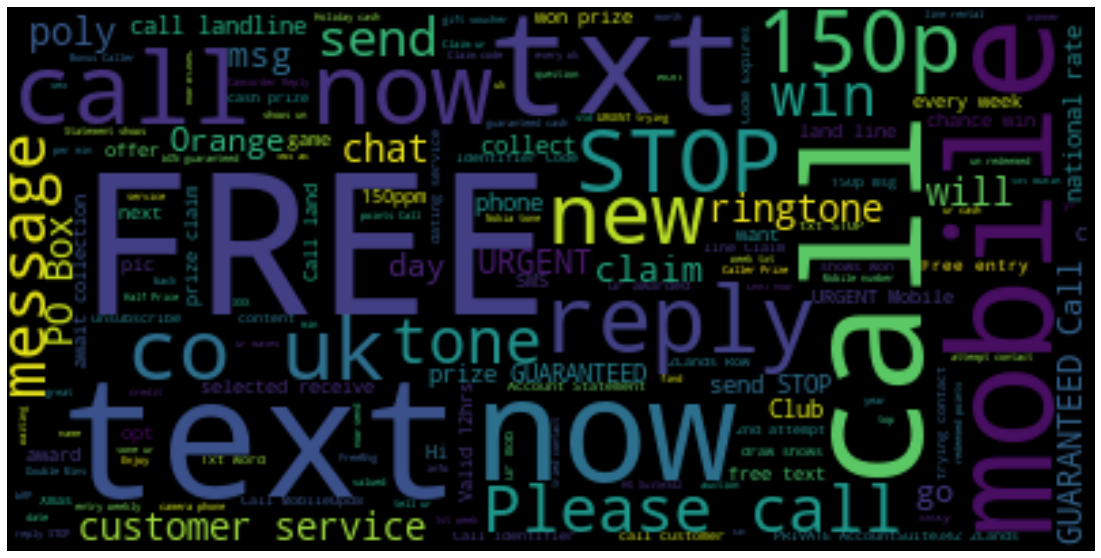

In [25]:
text = '.'.join(list(df[df['type'] =='spam'].text.values))
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud of ham

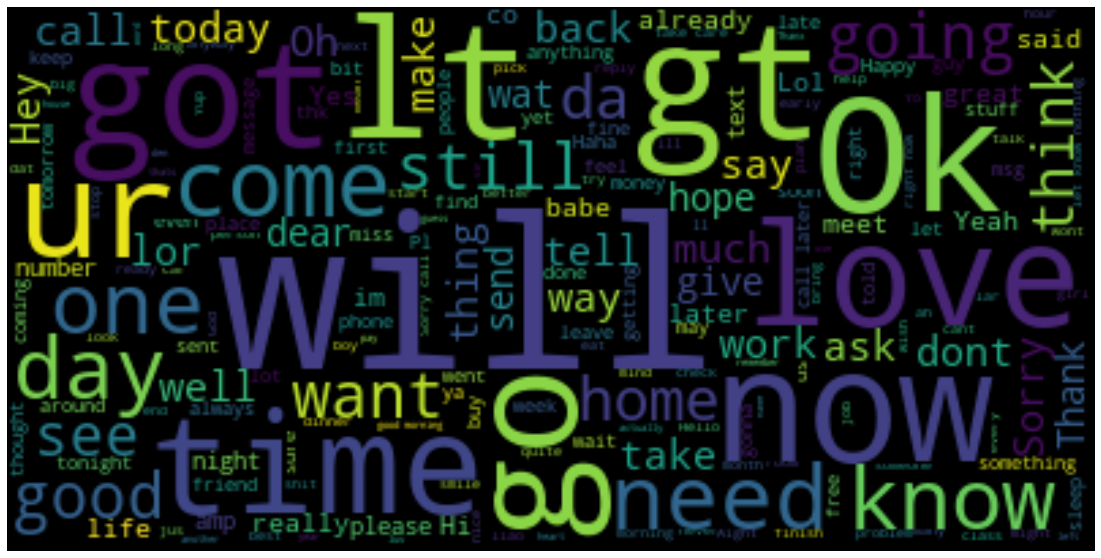

In [26]:
text = '.'.join(list(df[df['type'] =='ham'].text.values))
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
Question 3

binarize the outcome

In [27]:
df['binary_outcome'] = df['type'].map(lambda x : 1 if x == 'spam' else 0) 

In [28]:
_ = df.pop('type')

In [29]:
y = df.pop('binary_outcome')
X = df['clean_text']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [31]:
feat_extractor = CountVectorizer()

In [32]:
scale = StandardScaler(with_mean=False)

In [38]:
from sklearn import naive_bayes

In [89]:
recallList = []

alphaList = np.arange(0.1, 1.1, 0.1)

for i in range(0, alphaList.size, 1):

    clf = naive_bayes.BernoulliNB(alpha = alphaList[i])
    pipe = Pipeline([('process', feat_extractor),('scale', scale), ('clf', clf)])
    pipe = pipe.fit(X_train, y_train)

    y_pred_train= pipe.predict(X_train)
    y_pred_test= pipe.predict(X_test)
  
    recall = metrics.recall_score(y_test,y_pred_test)
    print('recall',recall)
    
    recallList.append(recall)
print(alphaList)
print(recallList)

 
recall 0.9019607843137255
 
recall 0.8954248366013072
 
recall 0.8954248366013072
 
recall 0.8954248366013072
 
recall 0.8823529411764706
 
recall 0.8758169934640523
 
recall 0.8758169934640523
 
recall 0.8496732026143791
 
recall 0.8431372549019608
 
recall 0.8366013071895425
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.9019607843137255, 0.8954248366013072, 0.8954248366013072, 0.8954248366013072, 0.8823529411764706, 0.8758169934640523, 0.8758169934640523, 0.8496732026143791, 0.8431372549019608, 0.8366013071895425]


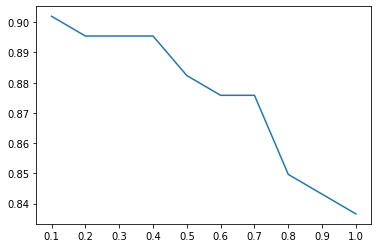

In [132]:
plt.xticks(alphaList)
plt.plot(alphaList, recallList)

Question 4 KNN

In [134]:
clf_k = KNeighborsClassifier(n_neighbors = 70) 

In [135]:
pipe_k = Pipeline([('process', feat_extractor),('scale', scale), ('clf', clf_k)])

In [136]:
pipe_k = pipe.fit(X_train, y_train)

In [137]:
y_pred_train= pipe.predict(X_train)

y_pred_test= pipe.predict(X_test)

recall = metrics.recall_score(y_test,y_pred_test)
print('recall',recall)

recall 0.8366013071895425
